In [1]:
import numpy as np
import matplotlib.pyplot as plt
import struct
import librosa
from librosa import onset

In [2]:
data= open('rough_dump.pcm', 'rb').read()
sr= 44100

In [3]:
y = struct.unpack('{0}h'.format(int(len(data)/2)), data)
y = np.array(y, dtype= float)

In [4]:
y_t = np.arange(y.shape[0])*(1/44100)

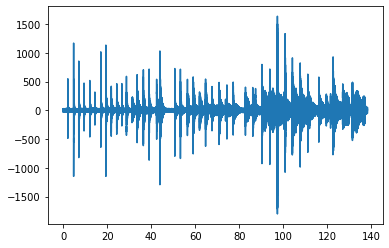

In [5]:

plt.plot(y_t, y)

In [6]:
onsets= librosa.onset.onset_detect(y= y, sr= 44100, units= 'time', backtrack= True, wait= 0.5*44100/512, delta= 0.2)
print(onsets)

[  2.15945578   4.79492063   7.14013605   9.53179138  12.15564626
  14.46603175  17.12471655  19.44671202  21.90802721  24.38095238
  26.70294785  28.79274376  31.30049887  33.63410431  36.44371882
  39.05596372  42.49251701  43.99020408  50.74721088  53.3014059
  56.49414966  59.11800454  61.99727891  64.72562358  67.19854875
  70.87891156  73.8278458   74.45478458  77.26439909  82.84879819
  86.15764172  90.36045351  93.87827664  97.26839002 100.78621315
 104.1414966  107.68253968 110.5385941  111.13070295 116.18104308
 119.59437642 121.53324263 122.6245805  127.01315193 131.47138322]


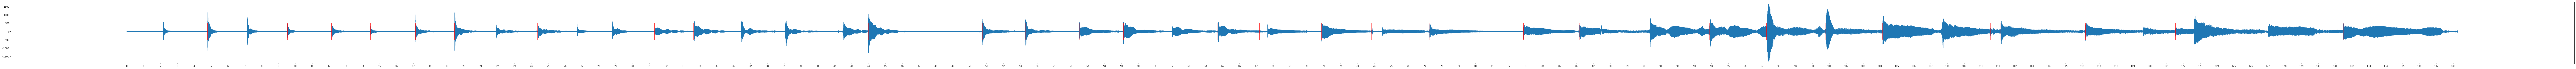

In [7]:
plt.figure(figsize=(200, 5))
plt.plot(y_t, y)
plt.vlines(onsets, -500, 500, color='red')
plt.xticks(np.arange(0, np.max(y_t), 1.0))
plt.tick_params(direction='in')
plt.savefig('onsets.png')

In [77]:
cqt= np.abs(librosa.cqt(y=y, sr= sr, fmin= librosa.note_to_hz('C2'), n_bins = 96))
#qt= np.abs(librosa.cqt(y=y, sr= sr, fmin= 32.7, n_bins = 96))

In [8]:
print(cqt.shape)

(96, 11911)


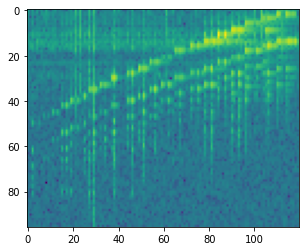

In [79]:
plt.imshow(np.log(cqt[:,::100]))

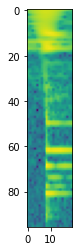

In [10]:
plt.imshow(np.log(cqt[:,180:200]))

In [26]:
yin= librosa.yin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('D6'))

In [36]:
import crepe

In [58]:
stime, sfrequency, sconfidence, sactivation = crepe.predict(y, 44100, viterbi=True)

4/4 [==============================] - 4s 851ms/step


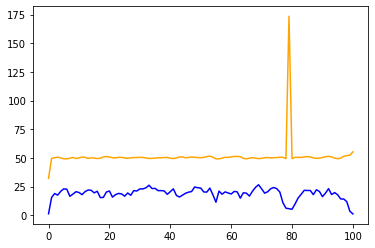

In [59]:
plt.plot(np.arange(len(stime)), 30*sconfidence, color='blue')
plt.plot(np.arange(len(stime)), sfrequency, color='orange')

In [ ]:
crepe.predict

In [80]:
time, frequency, confidence, activation = crepe.predict(y, 44100, viterbi=True, model_capacity= 'full')

433/433 [==============================] - 460s 1s/step


In [126]:
thres= 0.9
thres_idx= confidence > thres

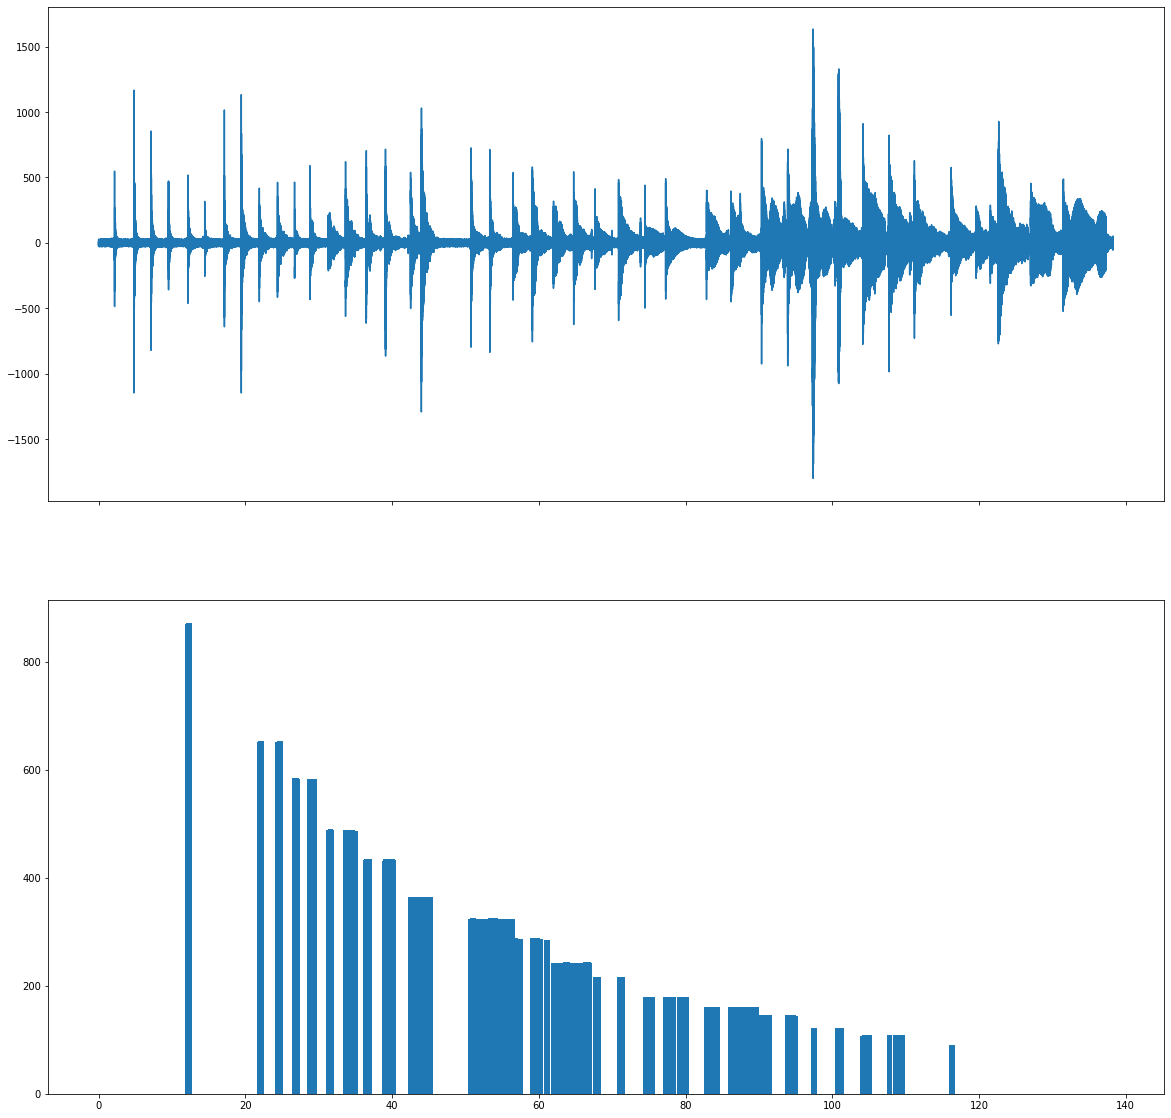

In [128]:
ax1,ax2= plt.figure(figsize=(20, 20)).subplots(2, sharex= True)
ax1.plot(y_t, y)
ax2.bar(time[thres_idx], (frequency[thres_idx]))
#plt.savefig('crepe-output-0.9-confidence.png')

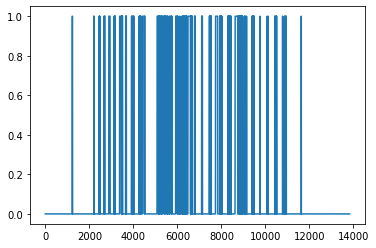

In [114]:
plt.plot(np.arange(len(confidence)),confidence>0.9)

In [72]:
maxidx=np.argmax(cqt[:,180:200], axis=0)

In [73]:
maxima= np.argmax(cqt, axis=0)

In [80]:
paint_in_max= np.log(np.copy(cqt))
for a,b in zip(range(maxima.shape[0]),maxima):
    paint_in_max[(b-1):(b+1),a]= 0.0

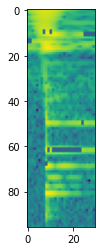

In [85]:
plt.imshow(paint_in_max[:,180:210])

In [ ]:
paint_in_max= np.copy

In [20]:
import cv_bridge
import cv2

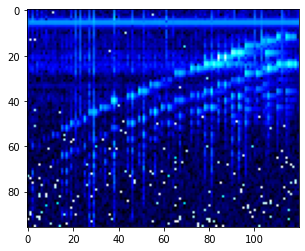

In [52]:
img = np.log(cqt[:,::100])
img = np.array(img/np.max(img)*255, dtype= np.uint8)
heatmap = cv2.applyColorMap(img, cv2.COLORMAP_HOT)
cv_bridge.CvBridge().cv2_to_imgmsg(heatmap, "bgr8")
plt.imshow(heatmap)

In [53]:
log_cqt = np.log(cqt)

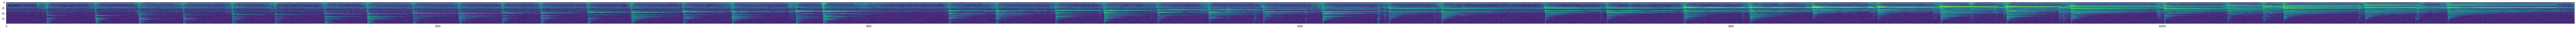

In [45]:
plt.figure(figsize=(200, 5))
plt.imshow(np.abs(cqt))
plt.savefig('cqt.png')

In [99]:
onset_env_cqt= onset.onset_strength(sr=sr, S=librosa.amplitude_to_db(cqt, ref=np.max))
onsets_cqt= librosa.onset.onset_detect(y= y, sr= 44100, onset_envelope= onset_env)

In [ ]:
librosa.amplitude_to_db

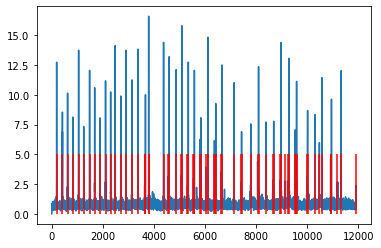

In [103]:
plt.plot(np.arange(onset_env_cqt.shape[0]), onset_env_cqt)
plt.vlines(onsets_cqt, 0.0, 5.0, color='red')

In [104]:
onset_env_default = librosa.onset.onset_strength(y=y, sr=sr)

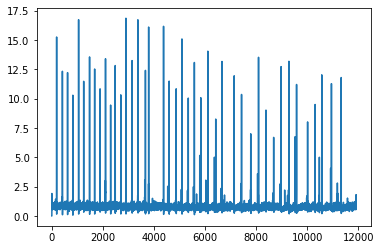

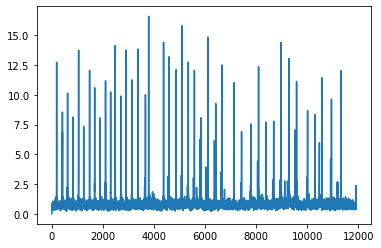

In [105]:
plt.plot(np.arange(onset_env_default.shape[0]), onset_env_default)
plt.figure()
plt.plot(np.arange(onset_env_cqt.shape[0]), onset_env_cqt)

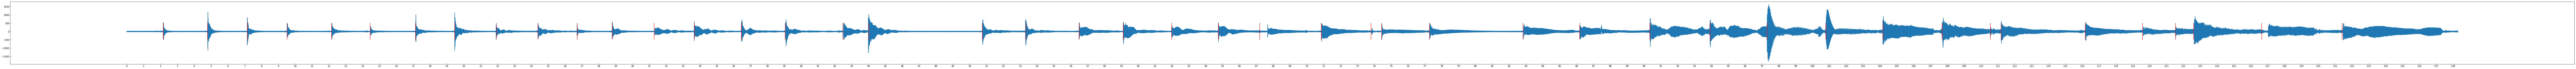

In [75]:
plt.figure(figsize=(200, 5))
plt.plot(y_t, y)
plt.vlines(onsets, -500, 500, color='red')
plt.xticks(np.arange(0, np.max(y_t), 1.0))
plt.tick_params(direction='in')
plt.savefig('onsets_default.png')

In [113]:
onsets_default= librosa.onset.onset_detect(y= y, sr= 44100, onset_envelope= onsets_env_default, units= 'time', backtrack= True, wait= 0.1*44100/512, delta= 0.2)

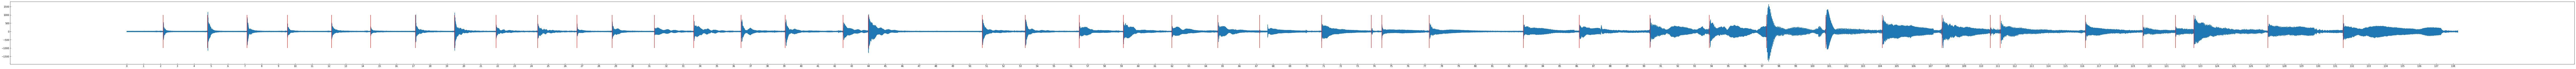

In [108]:
plt.figure(figsize=(200, 5))
plt.plot(y_t, y)
plt.vlines(onsets_default, -1000, 1000, color='red')
plt.xticks(np.arange(0, np.max(y_t), 1.0))
plt.tick_params(direction='in')
plt.savefig('onsets_default.png')

In [114]:
onsets_cqt= librosa.onset.onset_detect(y= y, sr= 44100, onset_envelope= onset_env_cqt, units= 'time', backtrack= True, wait= 0.1*44100/512, delta= 0.2)

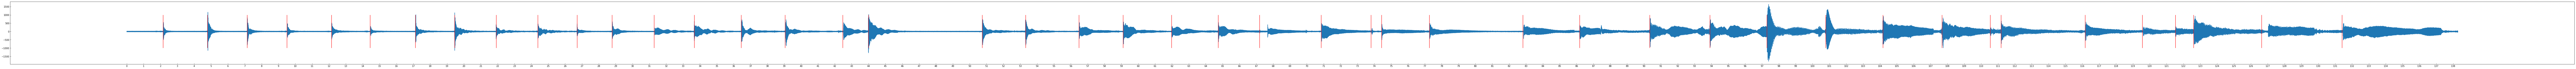

In [85]:
plt.figure(figsize=(200, 5))
plt.plot(y_t, y)
plt.vlines(onsets_cqt, -1000, 1000, color='red')
plt.xticks(np.arange(0, np.max(y_t), 1.0))
plt.tick_params(direction='in')
plt.savefig('onsets_cqt.png')

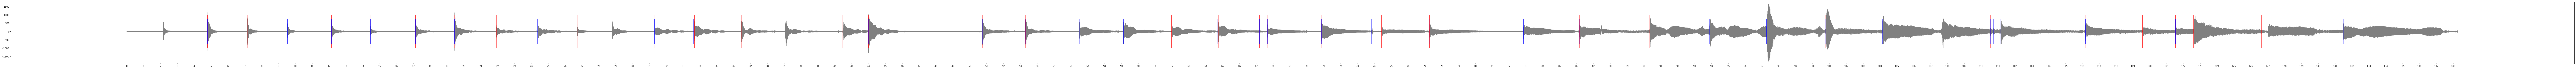

In [115]:
plt.figure(figsize=(200, 5))
plt.plot(y_t, y, color='gray')
plt.vlines(onsets_cqt, -1000, 1000, color='red')
plt.vlines(onsets_default, -750, 750, color='blue')
plt.xticks(np.arange(0, np.max(y_t), 1.0))
plt.tick_params(direction='in')
plt.savefig('onsets_compare_cqt_default.png')

In [116]:
print(onsets)

[  2.15945578   4.79492063   7.14013605   9.53179138  12.15564626
  14.46603175  17.12471655  19.44671202  21.90802721  24.38095238
  26.70294785  28.79274376  31.30049887  33.63410431  36.44371882
  39.05596372  42.49251701  43.99020408  50.74721088  53.3014059
  56.49414966  59.11800454  61.99727891  64.72562358  67.19854875
  70.87891156  73.8278458   74.45478458  77.26439909  82.84879819
  86.15764172  90.36045351  93.87827664  97.26839002 100.78621315
 104.1414966  107.68253968 110.5385941  111.13070295 116.18104308
 119.59437642 121.53324263 122.6245805  127.01315193 131.47138322]


In [117]:
print(onsets_cqt)

[  2.15945578   4.79492063   7.15174603   9.50857143  12.14403628
  14.44281179  17.12471655  19.458322    21.91963719  24.39256236
  26.71455782  28.79274376  31.28888889  33.66893424  36.4553288
  39.05596372  42.48090703  44.00181406  50.74721088  53.32462585
  56.48253968  59.10639456  61.97405896  64.74884354  67.19854875
  67.65133787  70.85569161  73.81623583  74.43156463  77.27600907
  82.82557823  86.19247166  90.34884354  93.91310658  97.29160998
 100.78621315 104.17632653 107.68253968 110.5385941  110.70113379
 111.18875283 116.16943311 119.55954649 121.53324263 122.60136054
 126.64163265 127.0247619  131.41333333]


In [118]:
print(onsets-onsets_cqt)

ValueError: operands could not be broadcast together with shapes (45,) (48,) 